# UNAD
## Cristian Camilo Aranda Sandoval
## Agrupamiento en Hierarchical clustering Mall

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/ 

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [13]:
#Cargar las librerias necesarias

import pandas as pd  # Manejo y análisis de estructuras de datos
import numpy as np  # Cálculo numérico y análisis de datos

# Importamos las librerías para la visualización de datos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones
import seaborn as sns  # Creación de gráficos estadísticos
import plotly.graph_objs as go  # Creación de gráficos en tres dimensiones
import plotly.express as px  # Creación de gráficos en tres dimensiones

# Importamos las librerías para el preprocesamiento y modelos de clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normalización y codificación de etiquetas
from sklearn.cluster import KMeans, AgglomerativeClustering  # Algoritmos de clustering

# Importamos las librerías para la evaluación de modelos
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Métricas de clustering
from sklearn import metrics  # Métricas generales
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet  # Análisis jerárquico y coeficiente cofenético
from scipy.spatial.distance import pdist  # Distancias entre pares de puntos

# Librería para evitar advertencias en la ejecución
import warnings
warnings.filterwarnings('ignore')


In [15]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [17]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [19]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

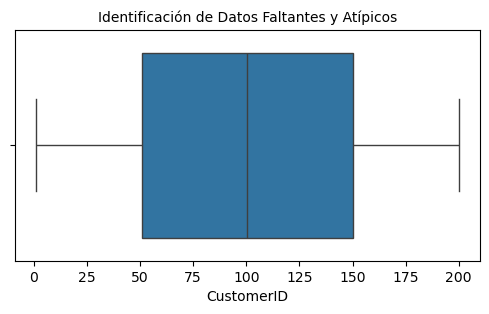

In [21]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['CustomerID'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

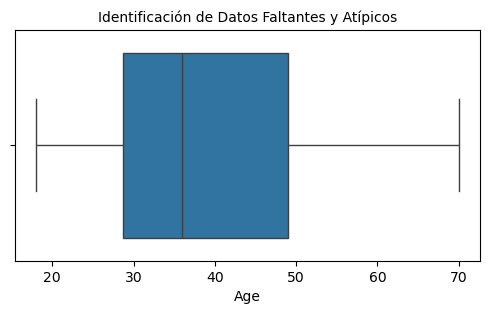

In [23]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

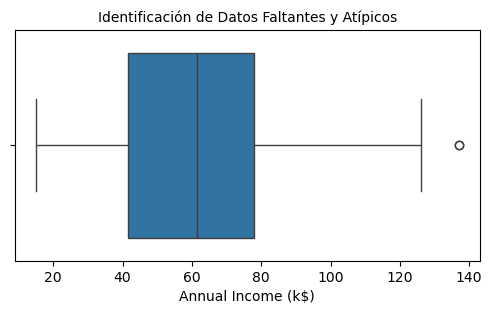

In [25]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

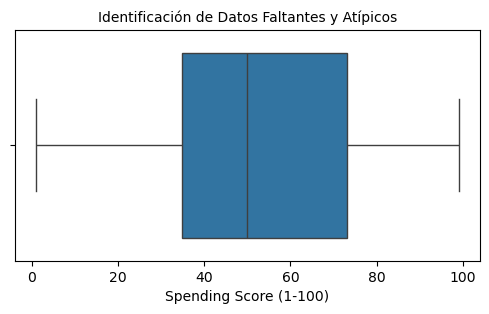

In [27]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [30]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en CustomerID: ",Datos['CustomerID'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en CustomerID:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


In [32]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['CustomerID']=Datos['CustomerID'].replace(0,Datos['CustomerID'].mean())
Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())
Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

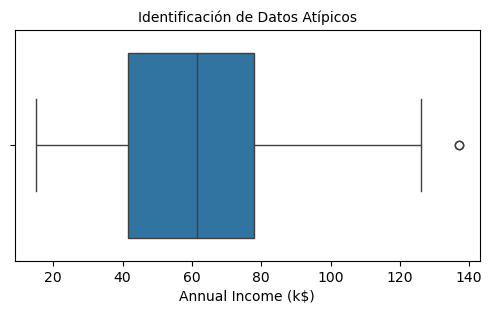

In [34]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [36]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Annual Income (k$)']<nivel_minimo)|(Datos['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

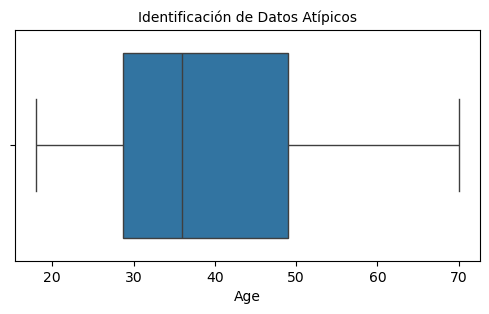

In [38]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [40]:
#Conteo de Datos Atípicos

nivel_minimo=18
nivel_maximo=80
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

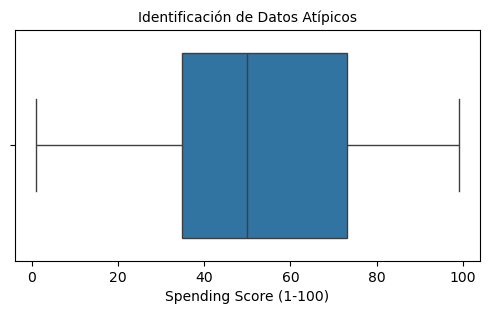

In [42]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [44]:
#Conteo de Datos Atípicos

nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [46]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Annual Income (k$)']<nivel_maximo)&(Datos['Annual Income (k$)']>nivel_minimo)]

In [48]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:
* Annual Income (k$)
* Spending Score (1-100)
* Age

In [52]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Spending Score (1-100)","Annual Income (k$)"]]

In [54]:
# Revisión de los datos de las variables objetivo

Datos.head(10)


,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17
5,22,76,17
6,35,6,18
7,23,94,18
8,64,3,19
9,30,72,19


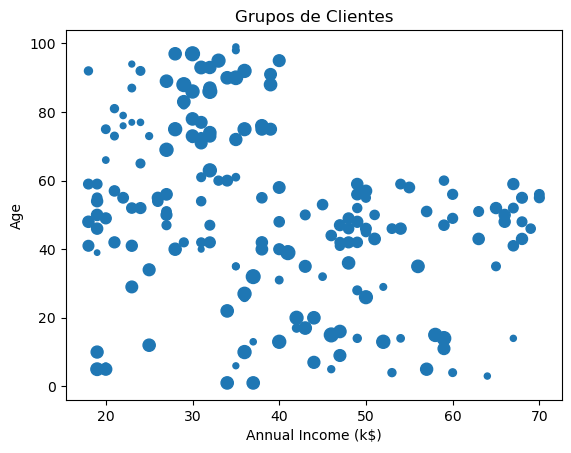

In [56]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Age'], Datos['Spending Score (1-100)'], Datos['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros (Hierarchical clustering)

In [59]:
#preparación de los datos

scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

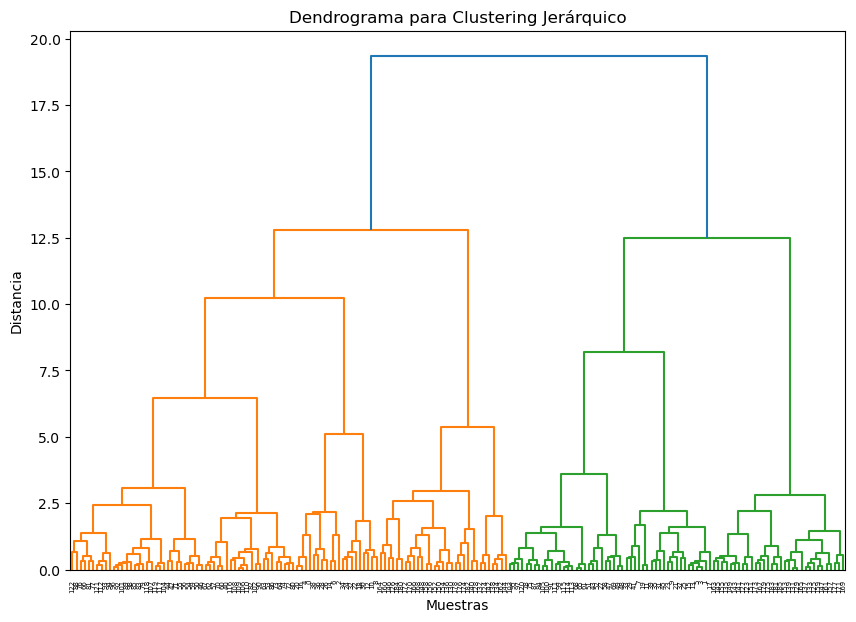

In [61]:
#Visualización del Dendrograma

# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [67]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(scaled_data)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3], dtype=int64)

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [73]:

# Reemplazar NaNs con la media de cada columna
Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)

# Preparación de las métricas para la tabla
Observaciones = len(Datos)
clusters = labels  # Asignamos las etiquetas predichas como los grupos

# Se calculan las métricas
sil_score = silhouette_score(scaled_data, clusters)
calinski_score = calinski_harabasz_score(scaled_data, clusters)
davies_score = davies_bouldin_score(scaled_data, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprimir la tabla con las métricas
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))



+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         186         |
|  Coeficiente Silhouette  | 0.33213815748086906 |
| Indice Calinski Harabasz |  84.90139875046562  |
|  Indice Davies Bouldin   | 1.1305024940373656  |
+--------------------------+---------------------+


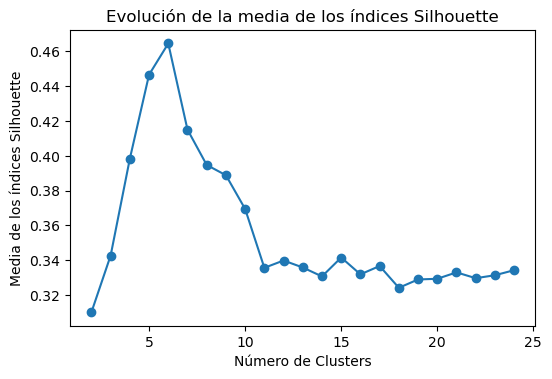

In [90]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Definir el rango de número de clusters
range_n_clusters = range(2, 25)
valores_medios_silhouette = []

# Iterar sobre el rango de número de clusters
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    linkage='ward',  # Usar 'ward' sin 'affinity'
                    n_clusters=n_clusters
             )
    # Aplicar el modelo y obtener las etiquetas de los clusters
    cluster_labels = modelo.fit_predict(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  # Usamos las columnas correctas de Datos
    silhouette_avg = silhouette_score(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], cluster_labels)  # Calculamos el score de Silhouette
    valores_medios_silhouette.append(silhouette_avg)

# Graficar la evolución de la media de los índices de Silhouette
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de la media de los índices Silhouette")
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Media de los índices Silhouette')
plt.show()

## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

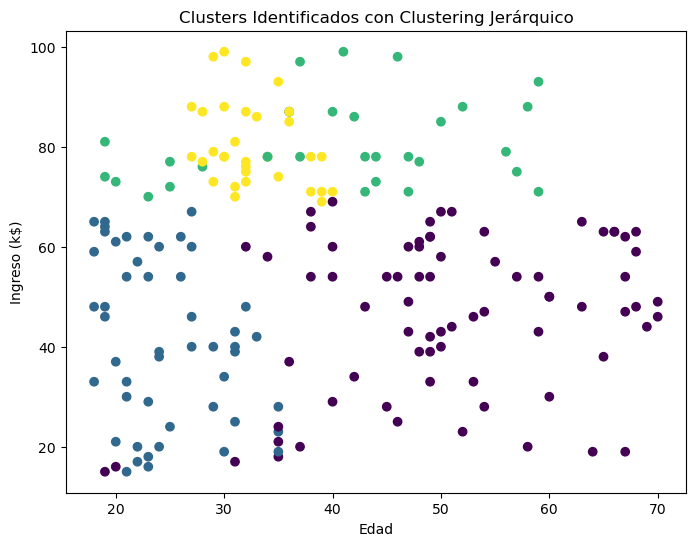

In [75]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters

# Aplicamos el modelo de clustering jerárquico y asignamos las etiquetas a la columna 'Cluster'
Datos['Cluster'] = model.fit_predict(scaled_data)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso (k$)')
plt.show()


Silhouette Score: 0.384942917114684


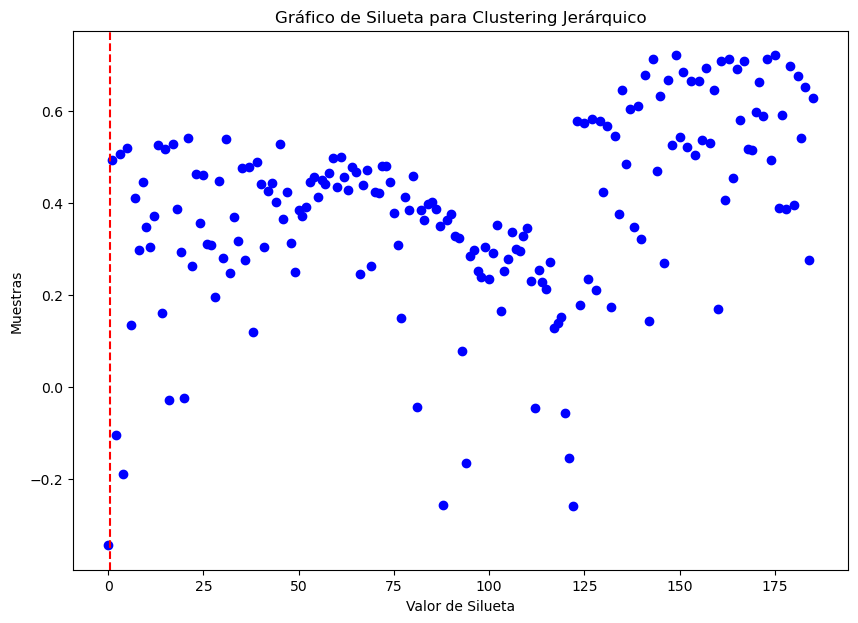

In [77]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

Interpretación: El valor de la silueta ayuda a medir la calidad del clustering. Un valor cercano a +1 indica una buena asignación de los puntos a los clusters, mientras que valores cercanos a -1 indican que los puntos podrían estar mal clasificados.

## 7. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

-Coeficiente de Silhouette: La puntuación de Silhouette es 0.332, lo que indica que los clústeres tienen una separación moderada. Aunque no es una puntuación muy alta, aún sugiere que los clústeres están algo bien definidos, pero puede haber algunas solapamientos o superposiciones entre ellos. Idealmente, una puntuación más cercana a 1 sería mejor, ya que indicaría una mayor separación y mayor cohesión dentro de los grupos.

-Índice de Calinski-Harabasz: El valor de 84.90 es relativamente bajo, lo que sugiere que la estructura de los clústeres no está completamente bien definida. En general, un valor más alto en este índice refleja una mayor dispersión entre los clústeres y mayor cohesión dentro de cada uno. Un valor más alto sería ideal para una mejor calidad en los clústeres.

-Índice de Davies-Bouldin: El valor de 1.13 es moderado, ya que un índice de Davies-Bouldin más bajo indica que los clústeres están más separados entre sí. Una puntuación más baja sería mejor, ya que indica una mayor distancia entre los clústeres y menos solapamiento entre ellos.